## Imports

In [168]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
import seaborn as sns

df_raw = pd.read_csv('../data/treino.csv')
df_test = pd.read_csv('../data/teste.csv')

In [108]:
def data_transformation(df):
    df = df_test.copy()
    df.columns = ['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
           'ano_modelo', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado',
           'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
           'tipo_anuncio', 'entrega_delivery', 'troca', 'elegivel_revisao',
           'aceita_troca', 'dono_unico',
           'todas_revisoes_concessionaria',
           'ipva_pago', 'licenciado',
           'garantia_de_fabrica',
           'todas_revisoes_agenda',
           'alienado']

    df['num_fotos'] = df['num_fotos'].fillna(0)

    df = df.drop('alienado', axis=1)

    na_cols = df.columns[-8:]

    for col in na_cols:
        df[col] = np.where(df[col].isna(), 0, 1)

    df[df.T.tail(8).index] = df[df.T.tail(8).index].astype('int64')

    df['ano_modelo'] = df['ano_modelo'].astype('int64')
    df['num_fotos'] = df['num_fotos'].astype('int64')

    X = df.copy().drop('id', axis=1)

    #drop cidades
    X = X.drop('cidade_vendedor', axis=1)

    #get uf
    X['estado_vendedor'] = X['estado_vendedor'].apply(lambda x: x[-3:-1])

    #numeric transformation
    num_columns = X.select_dtypes(exclude = 'object').columns
    cat_columns = X.select_dtypes('object').columns
    mms = pp.MinMaxScaler()

    for col in num_columns:
        X[col] = mms.fit_transform(X[[col]] )


    target_marca = pd.read_pickle('../parameters/marca_encode.pkl')
    target_modelo = pd.read_pickle('../parameters/modelo_encode.pkl')
    target_versao = pd.read_pickle('../parameters/versao_encode.pkl')
    target_tipo =  pd.read_pickle('../parameters/tipo_encode.pkl')
    frequency_cor = pd.read_pickle('../parameters/cor_encode.pkl')
    frequency_tipo_anuncio = pd.read_pickle('../parameters/tipo_anuncio_encode.pkl')
    map_cor = {'Preto':'preto', 'Branco':'branco', 'Prata':'prata', 'Cinza':'cinza', 'Dourado':'outros', 'Vermelho':'outros', 'Azul':'outros',
           'Verde':'outros'}

    map_regiao={'SP':'sudeste','RS':'sul','MG':'sudeste','PR':'sul','RJ':'sudeste','MA':'nordeste','SC':'sul','AL':'nordeste','BA':'nordeste','GO':'centro_oeste','RN':'nordeste','PE':'nordeste','MT':'centro_oeste','PA':'norte','CE':'nordeste','AM':'nordeste','ES':'sudeste','RO':'norte','PB':'nordeste','TO':'norte','AC':'norte','SE':'nordeste','MS':'centro_oeste','RR':'norte','PI':'nordeste'}


    map_cambio = {'Automática': 'auto', 'Manual' :'manual', 'CVT' :'auto', 'Automatizada': 'auto', 'Semi-automática': 'semi',
           'Automatizada DCT' : 'auto', 'Automática Sequencial' : 'auto'}


    #map categorical features
    X['cor'] = X['cor'].map(map_cor)
    X['cor'] = X['cor'].map(frequency_cor)
    X['tipo_anuncio'] = X['tipo_anuncio'].map(frequency_tipo_anuncio)
    X['estado_vendedor'] = X['estado_vendedor'].map(map_regiao)
    X['marca'] = X['marca'].map(target_marca)
    X['modelo'] = X['modelo'].map(target_modelo)
    X['versao'] = X['versao'].map(target_versao)
    X['tipo'] = X['tipo'].map(target_tipo)
    X['cambio'] = X['cambio'].map(map_cambio)


    X = pd.get_dummies(X, columns=['cor', 'blindado', 'estado_vendedor', 'cambio', 'tipo_vendedor'])

    return X
    
    

## Data Descriptions

In [109]:
df1 = df_raw.copy()

In [111]:
# rename columns
df1.columns = ['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'tipo_anuncio', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'aceita_troca', 'dono_unico',
       'todas_revisoes_concessionaria',
       'ipva_pago', 'licenciado',
       'garantia_de_fabrica',
       'todas_revisoes_agenda',
       'alienado', 'preco']

### Data dimension / types / nas

In [112]:
df_raw.shape

(39446, 29)

### Stats

### Change types / fillna

In [117]:
# NAS
# num_fotos                        0.006008
# aceita_troca                     0.258987
# dono_unico                       0.647670
# todas_revisoes_concessionaria    0.689728
# ipva_pago                        0.335218
# licenciado                       0.461289
# garantia_de_fabrica              0.853268
# todas_revisoes_agenda            0.799650
# alienado                         1.000000


df1['num_fotos'] = df1['num_fotos'].fillna(0)

df1 = df1.drop('alienado', axis=1)

na_cols = df1.columns[-8:-1]


for col in na_cols:
    df1[col] = np.where(df1[col].isna(), 0, 1)

df1[df1.T.tail(8).index] = df1[df1.T.tail(8).index].astype('int64')

df1['ano_modelo'] = df1['ano_modelo'].astype('int64')
df1['num_fotos'] = df1['num_fotos'].astype('int64')



## Data Filtering

In [118]:
sv.ana

## Feature Engineering

## EDA

## Data Preparation

In [119]:
X = df1.copy().drop('id', axis=1)

#one hot
#frequency
#target
#label 




#drop cidades
X = X.drop('cidade_vendedor', axis=1)

#get uf
X['estado_vendedor'] = X['estado_vendedor'].apply(lambda x: x[-3:-1])

#numeric transformation
num_columns = X.select_dtypes(exclude = 'object').columns
cat_columns = X.select_dtypes('object').columns
mms = pp.MinMaxScaler()

for col in num_columns:
    X[col] = mms.fit_transform(X[[col]] )
    

target_marca = X.groupby('marca')['preco'].mean()
target_modelo = X.groupby('modelo')['preco'].mean()
target_versao = X.groupby('versao')['preco'].mean()
target_tipo = X.groupby('tipo')['preco'].mean()
frequency_cor = X.groupby('cor')['preco'].count() / len(X)
frequency_tipo_anuncio = X.groupby('tipo_anuncio')['preco'].count() / len(X)

map_cor = {'Preto':'preto', 'Branco':'branco', 'Prata':'prata', 'Cinza':'cinza', 'Dourado':'outros', 'Vermelho':'outros', 'Azul':'outros',
       'Verde':'outros'}

map_regiao={'SP':'sudeste','RS':'sul','MG':'sudeste','PR':'sul','RJ':'sudeste','MA':'nordeste','SC':'sul','AL':'nordeste','BA':'nordeste','GO':'centro_oeste','RN':'nordeste','PE':'nordeste','MT':'centro_oeste','PA':'norte','CE':'nordeste','AM':'nordeste','ES':'sudeste','RO':'norte','PB':'nordeste','TO':'norte','AC':'norte','SE':'nordeste','MS':'centro_oeste','RR':'norte','PI':'nordeste'}


map_cambio = {'Automática': 'auto', 'Manual' :'manual', 'CVT' :'auto', 'Automatizada': 'auto', 'Semi-automática': 'semi',
       'Automatizada DCT' : 'auto', 'Automática Sequencial' : 'auto'}


#map categorical features
X['cor'] = X['cor'].map(map_cor)
X['cor'] = X['cor'].map(frequency_cor)
X['tipo_anuncio'] = X['tipo_anuncio'].map(frequency_tipo_anuncio)
X['estado_vendedor'] = X['estado_vendedor'].map(map_regiao)
X['marca'] = X['marca'].map(target_marca)
X['modelo'] = X['modelo'].map(target_modelo)
X['versao'] = X['versao'].map(target_versao)
X['tipo'] = X['tipo'].map(target_tipo)
X['cambio'] = X['cambio'].map(map_cambio)


X = pd.get_dummies(X, columns=['cor', 'blindado', 'estado_vendedor', 'cambio', 'tipo_vendedor'])


target_marca.to_pickle('../parameters/marca_encode.pkl')
target_modelo.to_pickle('../parameters/modelo_encode.pkl')
target_versao.to_pickle('../parameters/versao_encode.pkl')
frequency_cor.to_pickle('../parameters/cor_encode.pkl')
target_tipo.to_pickle('../parameters/tipo_encode.pkl')
frequency_tipo_anuncio.to_pickle('../parameters/tipo_anuncio_encode.pkl')


frequency_tipo_anuncio = X.groupby('tipo_anuncio')['preco'].count() / len(X)

In [120]:
y = X['preco'].copy()
X = X.drop('preco', axis=1)

In [162]:
df_raw[df_raw['preco'].index.isin(y_test.index)]['preco']

0        123231.992782
1        272076.023576
2         53411.539492
7        185623.340419
11        85615.508752
             ...      
39421    214775.150719
39428    120570.378273
39432    145656.738164
39439    367541.346552
39441    146046.941064
Name: preco, Length: 7890, dtype: float64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [122]:
# model definition
lr = LinearRegression()

# model train
lr.fit(X_train, y_train)

# predict
y_hat = lr.predict(X_test)

# performance
print(mean_absolute_error(y_test, y_hat))
print(np.sqrt(mean_squared_error(y_test, y_hat)))

0.020293285249149806
0.03203856899635487


In [177]:
comparacao = pd.DataFrame()
comparacao['real'] = df_raw[df_raw['preco'].index.isin(y_test.index)]['preco']
comparacao['predicao'] = mms.inverse_transform(y_hat.reshape(-1,1))

comparacao['diff'] = comparacao['real'] -  comparacao['predicao']

mean_absolute_error(comparacao['real'], comparacao['predicao'])

80066.9161900173

C:\Users\Heithor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff', ylabel='Density'>

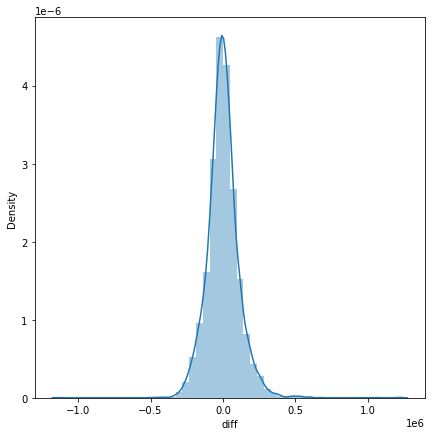

In [176]:
plt.figure(figsize=(7,7))

# sns.scatterplot(x='real', y='predicao', hue='diff',data=comparacao)
sns.distplot(comparacao['diff'])

In [ ]:
co

In [39]:
(comparacao['diff']**2).sum()

7.2146888612085815

## ML Models

In [76]:
mms.inverse_transform(y_hat)

ValueError: Expected 2D array, got 1D array instead:
array=[0.04609416 0.08462698 0.06301139 ... 0.10438666 0.24985754 0.03949983].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [99]:
X_test = data_transformation(df_test)


# predict
y_hat = lr.predict(X_test.fillna(0))

teste = pd.DataFrame()
teste['ID'] = df_test['ID'] 
teste['preco'] = mms.inverse_transform(y_hat.reshape(-1,1))



ValueError: Length of values (1) does not match length of index (39446)

In [ ]:
sns.scatterplot(x='preco', y='')

In [75]:
teste.to_csv('../data/submition.csv', index=False)

array([-0.04925471, -0.02779203, -0.02484502, ...,  0.43075936,
        0.56199048,  0.87348188])

array([[ 69603.02822388],
       [121720.78588588],
       [ 92484.51889493],
       ...,
       [148446.83695022],
       [345204.15240069],
       [ 60683.84327283]])

array([[0.08574428],
       [0.19579087],
       [0.03412311],
       ...,
       [0.12272218],
       [0.15852492],
       [0.1798958 ]])